In [1]:
%matplotlib inline

import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

import matplotlib
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<h3> Glossary </h3> 
<p> DT = DAILY TRANSACTIONS</p>
<P> DUA = DAILY UNIQUE ADRESSES </P>
<P> DTV = DAILY TRANSACTION VOLUME </P>
<P> DDTV = DAILY DOLLAR TRANSACTION VOLUME </P>
<p> BIC = BITCOIN IN CIRCULATION </p>
<p> MP = MARKET PRICE </p>

In [3]:
DT_get = requests.get("https://blockchain.info/charts/n-transactions?timespan=all&format=json")
DUA_get = requests.get("https://blockchain.info/charts/n-unique-addresses?timespan=all&format=json")
DTV_get = requests.get("https://blockchain.info/charts/estimated-transaction-volume?timespan=all&format=json")
DDTV_get = requests.get("https://blockchain.info/charts/estimated-transaction-volume-usd?timespan=all&format=json")
BIC_get = requests.get("https://blockchain.info/charts/total-bitcoins?timespan=all&format=json")
MP_get = requests.get("https://blockchain.info/charts/market-price?timespan=all&format=json")

In [4]:
DT_json = DT_get.json()
DUA_json = DUA_get.json()
DTV_json = DTV_get.json()
DDTV_json = DDTV_get.json()
BIC_json = BIC_get.json()
MP_json = MP_get.json()

In [5]:
DT_json['values']

[{'x': 1230940800, 'y': 1},
 {'x': 1231113600, 'y': 0},
 {'x': 1231286400, 'y': 0},
 {'x': 1231459200, 'y': 14},
 {'x': 1231632000, 'y': 106},
 {'x': 1231804800, 'y': 116},
 {'x': 1231977600, 'y': 136},
 {'x': 1232150400, 'y': 109},
 {'x': 1232323200, 'y': 120},
 {'x': 1232496000, 'y': 115},
 {'x': 1232668800, 'y': 68},
 {'x': 1232841600, 'y': 195},
 {'x': 1233014400, 'y': 105},
 {'x': 1233187200, 'y': 122},
 {'x': 1233360000, 'y': 129},
 {'x': 1233532800, 'y': 127},
 {'x': 1233705600, 'y': 126},
 {'x': 1233878400, 'y': 129},
 {'x': 1234051200, 'y': 135},
 {'x': 1234224000, 'y': 127},
 {'x': 1234396800, 'y': 119},
 {'x': 1234569600, 'y': 141},
 {'x': 1234742400, 'y': 123},
 {'x': 1234915200, 'y': 124},
 {'x': 1235088000, 'y': 129},
 {'x': 1235260800, 'y': 125},
 {'x': 1235433600, 'y': 111},
 {'x': 1235606400, 'y': 96},
 {'x': 1235779200, 'y': 103},
 {'x': 1235952000, 'y': 104},
 {'x': 1236124800, 'y': 106},
 {'x': 1236297600, 'y': 119},
 {'x': 1236470400, 'y': 115},
 {'x': 1236643200, 

In [6]:
type(DT_json)
#Prep_y = pd.DataFrame(list(x.values())[1])

dict

In [7]:
DT = pd.DataFrame(DT_json['values'])
DT.columns = ['Date', 'Transactions']

DUA = pd.DataFrame(DUA_json['values'])
DUA.columns = ['Date', 'UniqueAdresses']
DUA = DUA.drop('Date', axis=1)

DTV = pd.DataFrame(DTV_json['values'])
DTV.columns = ['Date', 'TransactionVolume']
DTV = DTV.drop('Date', axis=1)

DDTV = pd.DataFrame(DDTV_json['values'])
DDTV.columns = ['Date', 'DailyDollarTransactionVolume']
DDTV = DDTV.drop('Date', axis=1)

BIC = pd.DataFrame(BIC_json['values'])
BIC.columns = ['Date', 'BitCoinInCirculation']
BIC = BIC.drop('Date', axis=1)

MP = pd.DataFrame(MP_json['values'])
MP.columns = ['Date', 'MarketPrice']
MP = MP.drop('Date', axis=1)


In [8]:
DataSet = pd.concat([DT, DUA], axis=1)
DataSet = pd.concat([DataSet, DTV], axis=1)
DataSet = pd.concat([DataSet, DDTV], axis=1)
DataSet = pd.concat([DataSet, BIC], axis=1)
DataSet = pd.concat([DataSet, MP], axis=1)
DataSet['Date'] = pd.to_datetime(DataSet['Date'],unit='s')
DataSet

,Date,Transactions,UniqueAdresses,TransactionVolume,DailyDollarTransactionVolume,BitCoinInCirculation,MarketPrice
0,2009-01-03,1,1,0.000,0.000,50.000,0.000
1,2009-01-05,0,0,0.000,0.000,50.000,0.000
2,2009-01-07,0,0,0.000,0.000,50.000,0.000
3,2009-01-09,14,14,0.000,0.000,750.000,0.000
4,2009-01-11,106,106,0.000,0.000,7600.000,0.000
5,2009-01-13,116,117,10.000,0.000,17800.000,0.000
6,2009-01-15,136,136,414.000,0.000,30450.000,0.000
7,2009-01-17,109,109,100.000,0.000,41650.000,0.000
8,2009-01-19,120,120,150.000,0.000,52650.000,0.000
9,2009-01-21,115,115,500.000,0.000,64100.000,0.000


In [9]:
DataSet = DataSet.drop('DailyDollarTransactionVolume', axis = 1)

In [10]:
DataSet.describe()

,Transactions,UniqueAdresses,TransactionVolume,BitCoinInCirculation,MarketPrice
count,1563.000,1563.000,1563.000,1563.000,1563.000
mean,77365.365,141285.381,173869.559,9768942.035,287.875
std,91879.010,171463.784,244106.724,5146796.434,455.869
min,0.000,0.000,0.000,50.000,0.000
25%,1925.000,2707.000,50499.500,5498425.000,0.850
50%,48349.000,51067.000,145742.000,11033475.000,90.990
75%,110177.000,229439.500,242253.500,14235150.000,434.740
max,367710.000,687290.000,5313161.000,16467875.000,2898.180


In [11]:
DataSet.corr()

,Transactions,UniqueAdresses,TransactionVolume,BitCoinInCirculation,MarketPrice
Transactions,1.000,0.987,0.294,0.802,0.761
UniqueAdresses,0.987,1.000,0.279,0.804,0.795
TransactionVolume,0.294,0.279,1.000,0.352,0.167
BitCoinInCirculation,0.802,0.804,0.352,1.000,0.622
MarketPrice,0.761,0.795,0.167,0.622,1.000


<h3> Transactions vs MarketPrice </h3>

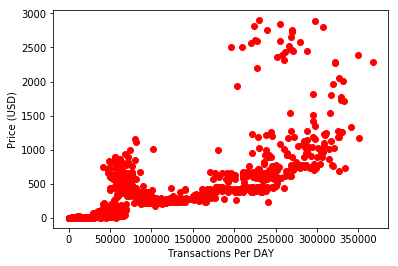

In [12]:
plt.plot(DataSet.Transactions, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('Transactions Per DAY')
plt.show()

<h3> UniqueAdresses vs MarketPrice</h3>

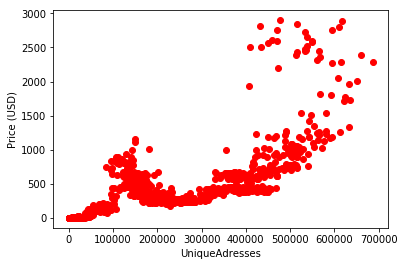

In [13]:
plt.plot(DataSet.UniqueAdresses,DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('UniqueAdresses')
plt.show()

<h3> TransactionVolume vs MarketPrice</h3>

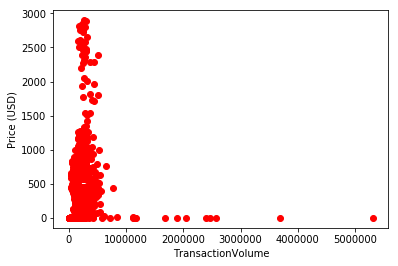

In [14]:
plt.plot(DataSet.TransactionVolume, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('TransactionVolume')
plt.show()

<h3> BitCoinInCirculation vs MarketPrice</h3>

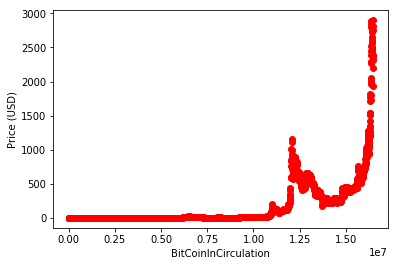

In [15]:
plt.plot(DataSet.BitCoinInCirculation, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('BitCoinInCirculation')
plt.show()

# FEATURE CREATION

<h3> Bollinger Bands </h3> 

In [16]:
Market_Price = DataSet[['Date','MarketPrice']]

In [17]:
Market_Price.columns = ['Date','Close']

In [18]:
#Bollinger Bands  
def BBANDS(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n))  
    MSD = pd.Series(pd.rolling_std(df['Close'], n))  
    b1 = MA + 2*MSD 
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = MA-2*MSD  
    B2 = pd.Series(b2, name = 'Bollingerb_' + str(n))  
    df = df.join(B2)  
    return df

In [19]:
bb = BBANDS(Market_Price, 10)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


In [20]:
bb

,Date,Close,BollingerB_10,Bollingerb_10
0,2009-01-03,0.000,nan,nan
1,2009-01-05,0.000,nan,nan
2,2009-01-07,0.000,nan,nan
3,2009-01-09,0.000,nan,nan
4,2009-01-11,0.000,nan,nan
5,2009-01-13,0.000,nan,nan
6,2009-01-15,0.000,nan,nan
7,2009-01-17,0.000,nan,nan
8,2009-01-19,0.000,nan,nan
9,2009-01-21,0.000,0.000,0.000


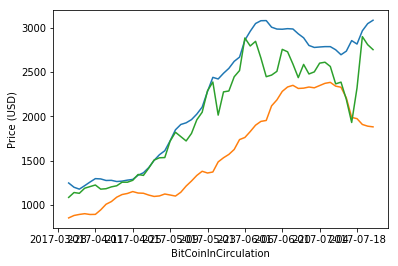

In [21]:
plot_data = bb[bb['Date'] >= '2017-04-01']
plt.plot(plot_data.Date ,plot_data.BollingerB_10)
plt.plot(plot_data.Date ,plot_data.Bollingerb_10)
plt.plot(plot_data.Date ,plot_data.Close)
plt.ylabel('Price (USD)')
plt.xlabel('BitCoinInCirculation')
plt.show()

<h3> Trix </h3>

In [22]:
#Trix  
def TRIX(df, n):  
    EX1 = pd.ewma(df['Close'], span = n, min_periods = n - 1)  
    EX2 = pd.ewma(EX1, span = n, min_periods = n - 1)  
    EX3 = pd.ewma(EX2, span = n, min_periods = n - 1)  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [23]:
trix = TRIX(Market_Price,15)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=15,min_periods=14,adjust=True,ignore_na=False).mean()
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=15,min_periods=14,adjust=True,ignore_na=False).mean()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=15,min_periods=14,adjust=True,ignore_na=False).mean()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in double_scala

<h3> MACD </h3>

In [24]:
#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(pd.ewma(df['Close'], span = n_fast, min_periods = n_slow - 1))  
    EMAslow = pd.Series(pd.ewma(df['Close'], span = n_slow, min_periods = n_slow - 1))  
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(pd.ewma(MACD, span = 9, min_periods = 8), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [25]:
macd = MACD(Market_Price,12,26)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=12,min_periods=25,adjust=True,ignore_na=False).mean()
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=26,min_periods=25,adjust=True,ignore_na=False).mean()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=9,min_periods=8,adjust=True,ignore_na=False).mean()


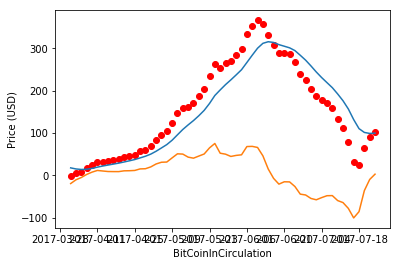

In [26]:
plot_data = macd[macd['Date'] >= '2017-04-01']
plt.plot(plot_data.Date ,plot_data.MACD_12_26, 'ro')
plt.plot(plot_data.Date ,plot_data.MACDsign_12_26)
plt.plot(plot_data.Date ,plot_data.MACDdiff_12_26)
plt.ylabel('Price (USD)')
plt.xlabel('BitCoinInCirculation')
plt.show()

<h3> KST OScillator </h3> 

In [27]:
#KST Oscillator  
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4,w1,w2,w3,w4):  
    M = df['Close'].diff(r1 - 1)  
    N = df['Close'].shift(r1 - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(r2 - 1)  
    N = df['Close'].shift(r2 - 1)  
    ROC2 = M / N  
    M = df['Close'].diff(r3 - 1)  
    N = df['Close'].shift(r3 - 1)  
    ROC3 = M / N  
    M = df['Close'].diff(r4 - 1)  
    N = df['Close'].shift(r4 - 1)  
    ROC4 = M / N  
    KST = pd.Series(pd.rolling_sum(ROC1, n1)*w1 + pd.rolling_sum(ROC2, n2) * w2 + pd.rolling_sum(ROC3, n3) * w3 + pd.rolling_sum(ROC4, n4) * w4, name = 'KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))  
    df = df.join(KST)  
    return df

In [28]:
kst = KST(Market_Price,10,15,20,30,10,10,10,15,1,2,3,4)


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).sum()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).sum()


<h3> True Strength Index  </h3> 

In [29]:
#True Strength Index  
def TSI(df, r, s):  
    M = pd.Series(df['Close'].diff(1))  
    aM = abs(M)  
    EMA1 = pd.Series(pd.ewma(M, span = r, min_periods = r - 1))  
    aEMA1 = pd.Series(pd.ewma(aM, span = r, min_periods = r - 1))  
    EMA2 = pd.Series(pd.ewma(EMA1, span = s, min_periods = s - 1))  
    aEMA2 = pd.Series(pd.ewma(aEMA1, span = s, min_periods = s - 1))  
    TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
    df = df.join(TSI)  
    return df



In [30]:
tsi = TSI(Market_Price,25,13)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=25,min_periods=24,adjust=True,ignore_na=False).mean()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=25,min_periods=24,adjust=True,ignore_na=False).mean()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=13,min_periods=12,adjust=True,ignore_na=False).mean()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=13,min_periods=12,adjust=True,ignore_na=False).mean()


In [31]:
tsi

,Date,Close,TSI_25_13
0,2009-01-03,0.000,nan
1,2009-01-05,0.000,nan
2,2009-01-07,0.000,nan
3,2009-01-09,0.000,nan
4,2009-01-11,0.000,nan
5,2009-01-13,0.000,nan
6,2009-01-15,0.000,nan
7,2009-01-17,0.000,nan
8,2009-01-19,0.000,nan
9,2009-01-21,0.000,nan


In [ ]:
x = pd.merge(Market_Price, bb.drop('Close', axis = 1), on='Date')

In [ ]:
x

In [ ]:
kst

In [32]:
x = pd.merge(Market_Price, bb.drop('Close', axis = 1), on='Date')
x = pd.merge(x, macd.drop('Close', axis = 1), on='Date')
x = pd.merge(x, trix.drop('Close', axis = 1), on='Date')
x = pd.merge(x, kst.drop('Close', axis = 1), on='Date')
x = pd.merge(x, tsi.drop('Close', axis = 1), on='Date')

In [33]:
x = x.dropna()

In [34]:
x['y_pre'] = x.Close.shift(-7)

In [35]:
x['low_bol_diff'] = x['Close'] - x['Bollingerb_10']
x['hig_bol_diff'] = x['BollingerB_10'] - x['Close']

In [37]:
x.columns

Index(['Date', 'Close', 'BollingerB_10', 'Bollingerb_10', 'MACD_12_26',
       'MACDsign_12_26', 'MACDdiff_12_26', 'Trix_15',
       'KST_10_15_20_30_10_10_10_15', 'TSI_25_13', 'y_pre', 'low_bol_diff',
       'hig_bol_diff'],
      dtype='object')

In [38]:
x['y'] = x.apply(lambda x : 
                           0
                                   if (x['Close'] > x['y_pre'])                                     
                           else 1, axis = 1)

In [39]:
x = x.drop(['y_pre'], axis = 1)
p = x
x = x.drop(['Date'], axis=1)
x

,Close,BollingerB_10,Bollingerb_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Trix_15,KST_10_15_20_30_10_10_10_15,TSI_25_13,low_bol_diff,hig_bol_diff,y
339,0.250,0.353,0.103,0.055,0.042,0.013,0.064,248.665,0.421,0.147,0.103,1
340,0.290,0.357,0.129,0.056,0.045,0.011,0.065,269.539,0.404,0.161,0.067,0
341,0.280,0.361,0.143,0.056,0.047,0.009,0.065,278.196,0.385,0.137,0.081,0
342,0.280,0.362,0.160,0.055,0.049,0.007,0.063,286.437,0.371,0.120,0.082,0
343,0.280,0.358,0.182,0.054,0.050,0.004,0.061,296.899,0.361,0.098,0.078,0
344,0.280,0.347,0.211,0.053,0.050,0.002,0.059,304.192,0.352,0.069,0.067,0
345,0.280,0.342,0.226,0.051,0.051,0.000,0.056,304.406,0.346,0.054,0.062,0
346,0.280,0.342,0.226,0.049,0.050,-0.001,0.053,301.065,0.340,0.054,0.062,0
347,0.280,0.299,0.253,0.047,0.049,-0.003,0.050,292.351,0.335,0.027,0.019,0
348,0.270,0.298,0.256,0.044,0.048,-0.005,0.047,288.328,0.324,0.014,0.028,0


<h3> Some ML </h3>

In [40]:
p

,Date,Close,BollingerB_10,Bollingerb_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Trix_15,KST_10_15_20_30_10_10_10_15,TSI_25_13,low_bol_diff,hig_bol_diff,y
339,2010-11-12,0.250,0.353,0.103,0.055,0.042,0.013,0.064,248.665,0.421,0.147,0.103,1
340,2010-11-14,0.290,0.357,0.129,0.056,0.045,0.011,0.065,269.539,0.404,0.161,0.067,0
341,2010-11-16,0.280,0.361,0.143,0.056,0.047,0.009,0.065,278.196,0.385,0.137,0.081,0
342,2010-11-18,0.280,0.362,0.160,0.055,0.049,0.007,0.063,286.437,0.371,0.120,0.082,0
343,2010-11-20,0.280,0.358,0.182,0.054,0.050,0.004,0.061,296.899,0.361,0.098,0.078,0
344,2010-11-22,0.280,0.347,0.211,0.053,0.050,0.002,0.059,304.192,0.352,0.069,0.067,0
345,2010-11-24,0.280,0.342,0.226,0.051,0.051,0.000,0.056,304.406,0.346,0.054,0.062,0
346,2010-11-26,0.280,0.342,0.226,0.049,0.050,-0.001,0.053,301.065,0.340,0.054,0.062,0
347,2010-11-28,0.280,0.299,0.253,0.047,0.049,-0.003,0.050,292.351,0.335,0.027,0.019,0
348,2010-11-30,0.270,0.298,0.256,0.044,0.048,-0.005,0.047,288.328,0.324,0.014,0.028,0


In [41]:
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
from sklearn import metrics
from datetime import timedelta
from datetime import datetime

train, test = train_test_split(x, test_size = 0.4)

X_train = train.drop("y", axis=1)
Y_train = train["y"]
X_test = test.drop("y", axis = 1)
Y_test = test["y"]
X_train.shape, Y_train.shape

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


((734, 11), (734,))

In [ ]:
cv_params = {'max_depth': [6], 'min_child_weight': [10], 'learning_rate': [0.001, 0.005, 0.01],
             'n_estimators': [350], 'objective': ['reg:logistic','binary:logistic']}
ind_params = {'seed':0, 'subsample': 1, 'colsample_bytree': 1}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'precision', cv = 3, n_jobs = -1) 

optimized_GBM.fit(X_train, Y_train)
optimized_GBM.grid_scores_
print(optimized_GBM.best_score_)
print(optimized_GBM.best_params_)

In [43]:
list = [3,4,5,6,7,8,9,10,20,30,40,50,60,70,90,130]
for i in list: 
    random_forest = RandomForestClassifier(n_estimators=i, criterion='gini')
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    #random_forest.score(X_train, Y_train)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    acc_test = round(random_forest.score(X_test, Y_test) * 100, 2)
    auc = metrics.roc_auc_score(Y_test, Y_pred, average='macro', sample_weight=None)
    print(i,acc_random_forest,acc_test,"  ",auc)

3 97.68 79.39    0.784580324679
4 96.19 77.35    0.775993922944
5 97.68 78.16    0.77203359451
6 97.68 79.39    0.791715744013
7 99.05 81.02    0.800011949267
8 98.5 77.96    0.778050903877
9 99.46 80.82    0.802785886209
10 99.05 79.59    0.79153650501
20 99.46 80.2    0.796836858367
30 99.86 81.02    0.801957972722
40 100.0 83.06    0.825463887609
50 100.0 81.22    0.802427408204
60 100.0 82.04    0.812089243953
70 100.0 82.86    0.821751079702
90 100.0 84.08    0.83559515884
130 100.0 82.86    0.821102405217


In [44]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini')
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
#random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_test = round(random_forest.score(X_test, Y_test) * 100, 2)
auc = metrics.roc_auc_score(Y_test, Y_pred, average='macro', sample_weight=None)
print(i,acc_random_forest,acc_test,"  ",auc)

130 100.0 82.45    0.816271487342


In [45]:
importances = random_forest.feature_importances_

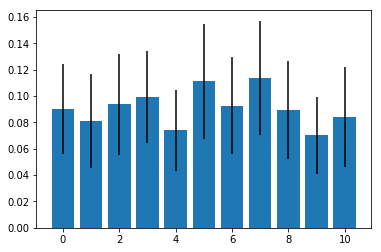

Close                         0.090
BollingerB_10                 0.081
Bollingerb_10                 0.094
MACD_12_26                    0.099
MACDsign_12_26                0.074
MACDdiff_12_26                0.111
Trix_15                       0.093
KST_10_15_20_30_10_10_10_15   0.114
TSI_25_13                     0.089
low_bol_diff                  0.070
hig_bol_diff                  0.084
Name: Importance, dtype: float64

In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
importance = random_forest.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in random_forest.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1] 

plt.bar(x, y, yerr=yerr, align="center")

plt.show()
y

In [ ]:
y = pd.DataFrame(y)
y.sort(['Importance'], ascending=False)

In [ ]:
X_test.shape

In [ ]:
predictions = random_forest.predict(p.drop(["Date","y"],axis = 1))

In [ ]:
y_hat = pd.DataFrame(predictions)

In [ ]:
y_hat.columns = ['y_hat']

In [ ]:
y_hat

In [ ]:
p = p.reset_index()

In [ ]:
final = p.join(y_hat, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [ ]:
final.shape

In [ ]:
final

In [ ]:
date = datetime.strptime('2017-01-10' , '%Y-%m-%d')

In [ ]:
date.strftime('%Y-%m-%d')

In [ ]:
final[final['Date'] >= date]

In [ ]:
date = (date + timedelta(days=14))

In [ ]:
date

<h3> Time for Simulation </h3>

In [ ]:
final

In [ ]:
temp_date = '2017-01-11'


In [ ]:
date = datetime.strptime(temp_date , '%Y-%m-%d')
while date <= final['Date'].max():
    print(1)
    hold_start_dollar = 1000
    hold_start_btc = 1000 / final[final['Date'] >= date].min().Close
    hold_end_dollar = hold_start_btc*final[final['Date'] == final['Date'].max()]['Close']
    play_dollar = 1000
    play_btc = 0
    for i in final[final['Date'] >= date]['Date']:
        if datetime.strptime(str(i)[:10], '%Y-%m-%d') == date:
            if final[final['Date'] == i]['y_hat'].values[0] == 1:
                if play_dollar > 0:
                    play_btc = play_dollar/final[final['Date'] == i]['Close'].values[0] - (1.49/100)*play_dollar/final[final['Date'] == i]['Close'].values[0]
                    play_dollar = 0
            if final[final['Date'] == i]['y_hat'].values[0] == 0:
                if play_dollar == 0:
                    play_dollar = play_btc*final[final['Date'] == i]['Close'].values[0] - (1.49/100)*play_btc*final[final['Date'] == i]['Close'].values[0]
                    play_btc = 0
            #print(i,"  :  BTC  ",play_btc,"  ,$ ", play_dollar)
            date = (date + timedelta(days=14))
        #print(datetime.strptime(str(i)[:10], '%Y-%m-%d'))
        
    play = play_btc*final[final['Date'] == final['Date'].max()]['Close'].values[0]
    hold = hold_end_dollar.values[0]
    print(date,"  play $",play,"   hold $",hold)
    date = date  + timedelta(days=2)

In [ ]:
play = play_btc*final[final['Date'] == final['Date'].max()]['Close'].values[0]
hold = hold_end_dollar.values[0]

In [ ]:
print("play $",play,"   hold $",hold)

In [ ]:
(play_btc*final[final['Date'] == final['Date'].max()]['Close'] - hold_end_dollar)/hold_end_dollar